In [11]:
!pip install torch==1.10.0+cu102 torchvision==0.11.1+cu102 torchaudio===0.10.0+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\coyol\Anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'torch'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\coyol\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\coyol\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\coyol\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\coyol\Anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\coyol\Anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\coyol\Anaconda3\lib\so


    return func(self, options, args)
  File "C:\Users\coyol\Anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 316, in run
    requirement_set = resolver.resolve(
  File "C:\Users\coyol\Anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 121, in resolve
    self._result = resolver.resolve(
  File "C:\Users\coyol\Anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 453, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "C:\Users\coyol\Anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 318, in resolve
    name, crit = self._merge_into_criterion(r, parent=None)
  File "C:\Users\coyol\Anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 173, in _merge_into_criterion
    crit = Criterion.from_requirement(self._p, requirement, parent)
  File "C:\Users\coyol\Anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 82, in from_requirement
 

In [1]:
!pip install torch
!pip install torchvision

In [3]:
import torch 
import torch.nn as nn
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 
import math
import os
from sklearn.model_selection import train_test_split

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
batch_size = 32 #64

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

path = 'C:/Users/coyol/Desktop/utec/ciclo2/AI/Proyecto3/'
#path = '/content/drive/Shareddrives/MachineLearning/CovidData/'

train_set = torchvision.datasets.ImageFolder(root=path+'train', transform = transforms.ToTensor())
val_set = torchvision.datasets.ImageFolder(root=path+'valid', transform = transforms.ToTensor())
test_set = torchvision.datasets.ImageFolder(root=path+'test', transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

print(len(train_set))
print(len(val_set))
print(len(test_set))

cpu
14818
4232
2115


In [7]:
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN3(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN3, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=2), #(299+2*2-3)/1+1 = 301
            nn.BatchNorm2d(16),
            nn.Dropout2d(0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)) #301/2=150.5 = 150
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2), #(150+2*2-5)/1+1 = 150
            nn.BatchNorm2d(32),
            nn.Dropout2d(0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)) #150/2 = 75
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2), #(75+2*2-5)/1+1 = 75
            nn.BatchNorm2d(64),
            nn.Dropout2d(0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)) #75/2 = 37
        self.fc = nn.Linear(37*37*64, num_classes) #Aplica una transformación lineal: y=xA.T + b
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [13]:
model         = CNN3(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([ e.shape  for e in model.fc.parameters()])

model.fc.weight

[torch.Size([4, 87616]), torch.Size([4])]


Parameter containing:
tensor([[ 0.0018,  0.0032, -0.0008,  ...,  0.0021,  0.0009,  0.0015],
        [ 0.0005, -0.0012,  0.0012,  ..., -0.0021,  0.0012, -0.0026],
        [ 0.0022, -0.0029,  0.0011,  ..., -0.0008,  0.0018, -0.0022],
        [ 0.0032,  0.0005, -0.0032,  ..., -0.0007,  0.0020, -0.0026]],
       requires_grad=True)

In [12]:
len(train_loader)

464

In [9]:
def checkStop(model, device, val_loader, loss_fn):
    # Settings
    model.eval()
    perdida = 0

    # Test validation data
    with torch.no_grad():
        for i, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            perdida += loss.item()

    return perdida / len(val_loader)

def train(model, optimizer, loss_fn, num_epochs,train_loader,val_loader, numChecks):
  #loss_vals = []
  ultimoError = 10000

  # train the model
  total_step = len(train_loader)  # el train loader es el motor que se encarga de sacar las imagenes del train_set

  list_loss= []
  list_time = []
  #list_loss_val = []
  
  j=0

  for epoch in range(num_epochs):
    k=0
    for i, (images, labels) in enumerate(train_loader):
    #for i in range(50):

      #images = train_loader[i][0].to(device)
      #labels = train_loader[i][1].to(device)

      images = images.to(device)
      labels = labels.to(device)
      
      # forward 
      output = model(images)
      loss   = loss_fn(output, labels)

      # change the params
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      list_loss.append(loss.item())
      list_time.append(j)
      j+=1

              
      if (i+1) % 100 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
      k+=1
      #if (k == 1000):
      #  break 

    # Se ejecuta despues de cada epoch
    # Se analiza el error sobre el conjunto de validacion - Eartly stopping
    validError = checkStop(model, device, val_loader, loss_fn)
    print('Error validacion:', validError)

    if validError > ultimoError:
        counter += 1
        # En caso no se mejore en n veces el error, se detiene el algoritmo
        if counter >= numChecks:
            return list_loss
    else:
        # Se vuelve a contar
        counter = 0

        # error actual es menor que el ultimo error
        ultimoError = validError
    #print("LastError: ",ultimoError)
  print('Finished Training Trainset')
  return list_loss


In [ ]:
numChecks = 2
train_loss = train(model,optimizer,loss_fn,num_epochs,train_loader,val_loader,numChecks)


Epoch [1/20], Step [100/464], Loss: 8.4278
Epoch [1/20], Step [200/464], Loss: 4.8450
Epoch [1/20], Step [300/464], Loss: 6.4378
Epoch [1/20], Step [400/464], Loss: 2.3327
Error validacion: 2.1165688656326522
Epoch [2/20], Step [100/464], Loss: 0.7712
Epoch [2/20], Step [200/464], Loss: 0.7496
Epoch [2/20], Step [300/464], Loss: 0.5754
Epoch [2/20], Step [400/464], Loss: 0.5644
Error validacion: 0.5952580096130085
Epoch [3/20], Step [100/464], Loss: 0.6474
Epoch [3/20], Step [200/464], Loss: 0.5411
Epoch [3/20], Step [300/464], Loss: 0.6453
Epoch [3/20], Step [400/464], Loss: 0.3876
Error validacion: 0.6374189466013944
Epoch [4/20], Step [100/464], Loss: 0.6897
Epoch [4/20], Step [200/464], Loss: 0.5406
Epoch [4/20], Step [300/464], Loss: 0.6501
Epoch [4/20], Step [400/464], Loss: 0.5481
Error validacion: 0.5285625870066478
Epoch [5/20], Step [100/464], Loss: 0.6588
Epoch [5/20], Step [200/464], Loss: 0.5519
Epoch [5/20], Step [300/464], Loss: 0.3208
Epoch [5/20], Step [400/464], Loss:

Text(0.5, 1.0, 'Training Error: Dropout en todas las Capas')

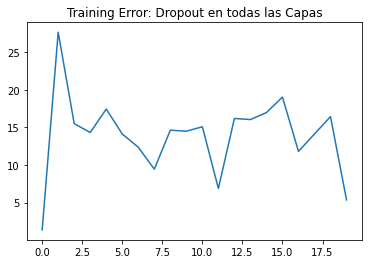

In [15]:
plt.plot(train_loss)
plt.title("Training Error: Dropout en todas las Capas")

In [16]:
#Precision con el set de validación (20%).
with torch.no_grad():
      correct = 0
      total = 0
      k=0
      for images, labels in val_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          #k+=1
          #if (k == 100):
          #  break
      print('Validation Accuracy of the model: {} %'.format(100 * correct / total))

Validation Accuracy of the model: 30.718954248366014 %


In [17]:
#Precision con el set de test (10%).
with torch.no_grad():
      correct = 0
      total = 0
      k=0
      for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          #k+=1
          #if (k == 100):
          #  break
      print('Test Accuracy of the model: {} %'.format(100 * correct / total))

Test Accuracy of the model: 30.864197530864196 %
